In [1]:
!pip install numpy xarray matplotlib rioxarray rasterio stackstac pystac-client planetary-computer odc-stac


In [89]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import common GIS tools
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray as rio
import rasterio
from matplotlib.cm import RdYlGn,jet,RdBu

# Import Planetary Computer tools
import stackstac
import pystac_client
import planetary_computer 
from odc.stac import stac_load
import pandas as pd
from datetime import datetime

In [91]:
data = pd.read_csv(r"C:\Users\haoho\Downloads\Training_data_uhi_index 2025-02-04.csv")

data['datetime'] = data['datetime'].apply(lambda x: datetime.strptime(x, "%d-%m-%Y %H:%M"))
data.head()

Longitude   Latitude            datetime  UHI Index
0 -73.919037  40.814292 2021-07-24 15:53:00   1.034616
1 -73.918978  40.814365 2021-07-24 15:53:00   1.028125
2 -73.918927  40.814433 2021-07-24 15:53:00   1.028125
3 -73.918875  40.814500 2021-07-24 15:53:00   1.025961
4 -73.918827  40.814560 2021-07-24 15:53:00   1.025961

In [92]:
data.dtypes

Longitude           float64
Latitude            float64
datetime     datetime64[ns]
UHI Index           float64
dtype: object

In [95]:
from geopy.distance import distance
from geopy.point import Point

radius = 5  # Radius in kilometers
bounds = []

for i in data.values:  # Assuming data.values contains [(lat, lon), (lat, lon), ...]
    center_point = Point(i[0], i[1])  # Create a geopy Point (latitude, longitude)

    # Compute bounding box (NW and SE corners)
    nw = distance(kilometers=radius).destination(center_point, 45)  # Northwest
    se = distance(kilometers=radius).destination(center_point, 225)  # Southeast

    # Store bounds in (min_lat, min_lon, max_lat, max_lon) format
    bounds.append((se.latitude, se.longitude, nw.latitude, nw.longitude))

In [96]:
data.insert(3, "Bounds", bounds)
data

Longitude   Latitude            datetime  \
0     -73.919037  40.814292 2021-07-24 15:53:00   
1     -73.918978  40.814365 2021-07-24 15:53:00   
2     -73.918927  40.814433 2021-07-24 15:53:00   
3     -73.918875  40.814500 2021-07-24 15:53:00   
4     -73.918827  40.814560 2021-07-24 15:53:00   
...          ...        ...                 ...   
11264 -73.957050  40.790333 2021-07-24 15:59:00   
11265 -73.957063  40.790308 2021-07-24 15:59:00   
11266 -73.957093  40.790270 2021-07-24 15:59:00   
11267 -73.957112  40.790253 2021-07-24 15:59:00   
11268 -73.957128  40.790237 2021-07-24 15:59:00   

                                                  Bounds  UHI Index  
0      (-73.95068451115094, 40.69976734527057, -73.88...   1.034616  
1      (-73.95062617144066, 40.69984108041456, -73.88...   1.028125  
2      (-73.95057451169721, 40.69990976916659, -73.88...   1.028125  
3      (-73.9505228419538, 40.6999767979857, -73.8871...   1.025961  
4      (-73.9504745121938, 40.70003713360829, -73.887...   1.025961  
...                                                  ...        ...  
11264  (-73.98869765232138, 40.675544383845356, -73.9...   0.972470  
11265  (-73.98871098225513, 40.67551929082798, -73.92...   0.972470  
11266  (-73.98874098210608, 40.675480751485985, -73.9...   0.981124  
11267  (-73.98875932201494, 40.67546395350784, -73.92...   0.981245  
11268  (-73.98877598193216, 40.67544717725263, -73.92...   0.983408  

[11269 rows x 5 columns]

In [97]:
x = data.iloc[:,0:4]
x

Longitude   Latitude            datetime  \
0     -73.919037  40.814292 2021-07-24 15:53:00   
1     -73.918978  40.814365 2021-07-24 15:53:00   
2     -73.918927  40.814433 2021-07-24 15:53:00   
3     -73.918875  40.814500 2021-07-24 15:53:00   
4     -73.918827  40.814560 2021-07-24 15:53:00   
...          ...        ...                 ...   
11264 -73.957050  40.790333 2021-07-24 15:59:00   
11265 -73.957063  40.790308 2021-07-24 15:59:00   
11266 -73.957093  40.790270 2021-07-24 15:59:00   
11267 -73.957112  40.790253 2021-07-24 15:59:00   
11268 -73.957128  40.790237 2021-07-24 15:59:00   

                                                  Bounds  
0      (-73.95068451115094, 40.69976734527057, -73.88...  
1      (-73.95062617144066, 40.69984108041456, -73.88...  
2      (-73.95057451169721, 40.69990976916659, -73.88...  
3      (-73.9505228419538, 40.6999767979857, -73.8871...  
4      (-73.9504745121938, 40.70003713360829, -73.887...  
...                                                  ...  
11264  (-73.98869765232138, 40.675544383845356, -73.9...  
11265  (-73.98871098225513, 40.67551929082798, -73.92...  
11266  (-73.98874098210608, 40.675480751485985, -73.9...  
11267  (-73.98875932201494, 40.67546395350784, -73.92...  
11268  (-73.98877598193216, 40.67544717725263, -73.92...  

[11269 rows x 4 columns]

In [98]:
y = data[['UHI Index']]
y

UHI Index
0       1.034616
1       1.028125
2       1.028125
3       1.025961
4       1.025961
...          ...
11264   0.972470
11265   0.972470
11266   0.981124
11267   0.981245
11268   0.983408

[11269 rows x 1 columns]

In [99]:
x_in_array = x.to_numpy()
x_in_array

array([[-73.91903667, 40.81429167, Timestamp('2021-07-24 15:53:00'),
        (-73.95068451115094, 40.69976734527057, -73.88732800919306, 40.92837776439721)],
       [-73.91897833, 40.814365, Timestamp('2021-07-24 15:53:00'),
        (-73.95062617144066, 40.69984108041456, -73.88726966913492, 40.92845069247601)],
       [-73.91892667, 40.81443333, Timestamp('2021-07-24 15:53:00'),
        (-73.95057451169721, 40.69990976916659, -73.88721800908343, 40.92851866657773)],
       ...,
       [-73.95709333, 40.79027, Timestamp('2021-07-24 15:59:00'),
        (-73.98874098210608, 40.675480751485985, -73.92538470683152, 40.90461890838228)],
       [-73.95711167, 40.79025333, Timestamp('2021-07-24 15:59:00'),
        (-73.98875932201494, 40.67546395350784, -73.92540304684951, 40.90460236534006)],
       [-73.95712833, 40.79023667, Timestamp('2021-07-24 15:59:00'),
        (-73.98877598193216, 40.67544717725263, -73.92541970686587, 40.904585820668366)]],
      dtype=object)

In [105]:
stac = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

search = stac.search(
    bbox = x['Bounds'][0],
    datetime = "2021-06-01T15:00:00Z/2021-12-31T16:00:00Z",
    collections = ['sentinel-2-l2a'],
    query={"eo:cloud_cover":{"lt":10}}
)!

items = list(search.get_items())
print('This is the number of scenes that touch our region:',len(items))


This is the number of scenes that touch our region: 18


In [81]:
x['datetime'][0].date()

datetime.date(2021, 7, 24)

In [107]:
signed_items = [planetary_computer.sign(item).to_dict() for item in items]

In [108]:
resolution = 10 
scale = resolution / 111320.0 
print(scale)

8.983111749910169e-05


In [109]:
items[0]

<Item id=S2B_MSIL2A_20211226T155649_R054_T18TWL_20211227T032032>

In [113]:
datas = stac_load(
    items,
    bands=["B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B11", "B12"],
    crs="EPSG:4326", # Latitude-Longitude
    resolution=scale, # Degrees
    chunks={"x": 2048, "y": 2048},
    dtype="uint16",
    patch_url=planetary_computer.sign,
    bbox= x['Bounds'][0]
)

In [115]:
x['Bounds'][0]

(-73.95068451115094, 40.69976734527057, -73.88732800919306, 40.92837776439721)

In [117]:
display(datas)

<xarray.Dataset> Size: 713MB
Dimensions:      (latitude: 2546, longitude: 707, time: 18)
Coordinates:
  * latitude     (latitude) float64 20kB 40.93 40.93 40.93 ... 40.7 40.7 40.7
  * longitude    (longitude) float64 6kB -73.95 -73.95 -73.95 ... -73.89 -73.89
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 144B 2021-06-06T15:38:09.024000 ... 20...
Data variables:
    B01          (time, latitude, longitude) uint16 65MB dask.array<chunksize=(1, 2048, 707), meta=np.ndarray>
    B02          (time, latitude, longitude) uint16 65MB dask.array<chunksize=(1, 2048, 707), meta=np.ndarray>
    B03          (time, latitude, longitude) uint16 65MB dask.array<chunksize=(1, 2048, 707), meta=np.ndarray>
    B04          (time, latitude, longitude) uint16 65MB dask.array<chunksize=(1, 2048, 707), meta=np.ndarray>
    B05          (time, latitude, longitude) uint16 65MB dask.array<chunksize=(1, 2048, 707), meta=np.ndarray>
    B06          (time, latitude, longitude) uint16 65MB dask.array<chunksize=(1, 2048, 707), meta=np.ndarray>
    B07          (time, latitude, longitude) uint16 65MB dask.array<chunksize=(1, 2048, 707), meta=np.ndarray>
    B08          (time, latitude, longitude) uint16 65MB dask.array<chunksize=(1, 2048, 707), meta=np.ndarray>
    B8A          (time, latitude, longitude) uint16 65MB dask.array<chunksize=(1, 2048, 707), meta=np.ndarray>
    B11          (time, latitude, longitude) uint16 65MB dask.array<chunksize=(1, 2048, 707), meta=np.ndarray>
    B12          (time, latitude, longitude) uint16 65MB dask.array<chunksize=(1, 2048, 707), meta=np.ndarray>

In [119]:
print(datas.nbytes / 1e9, "GB")  # Shows memory size in GB


0.712834884 GB


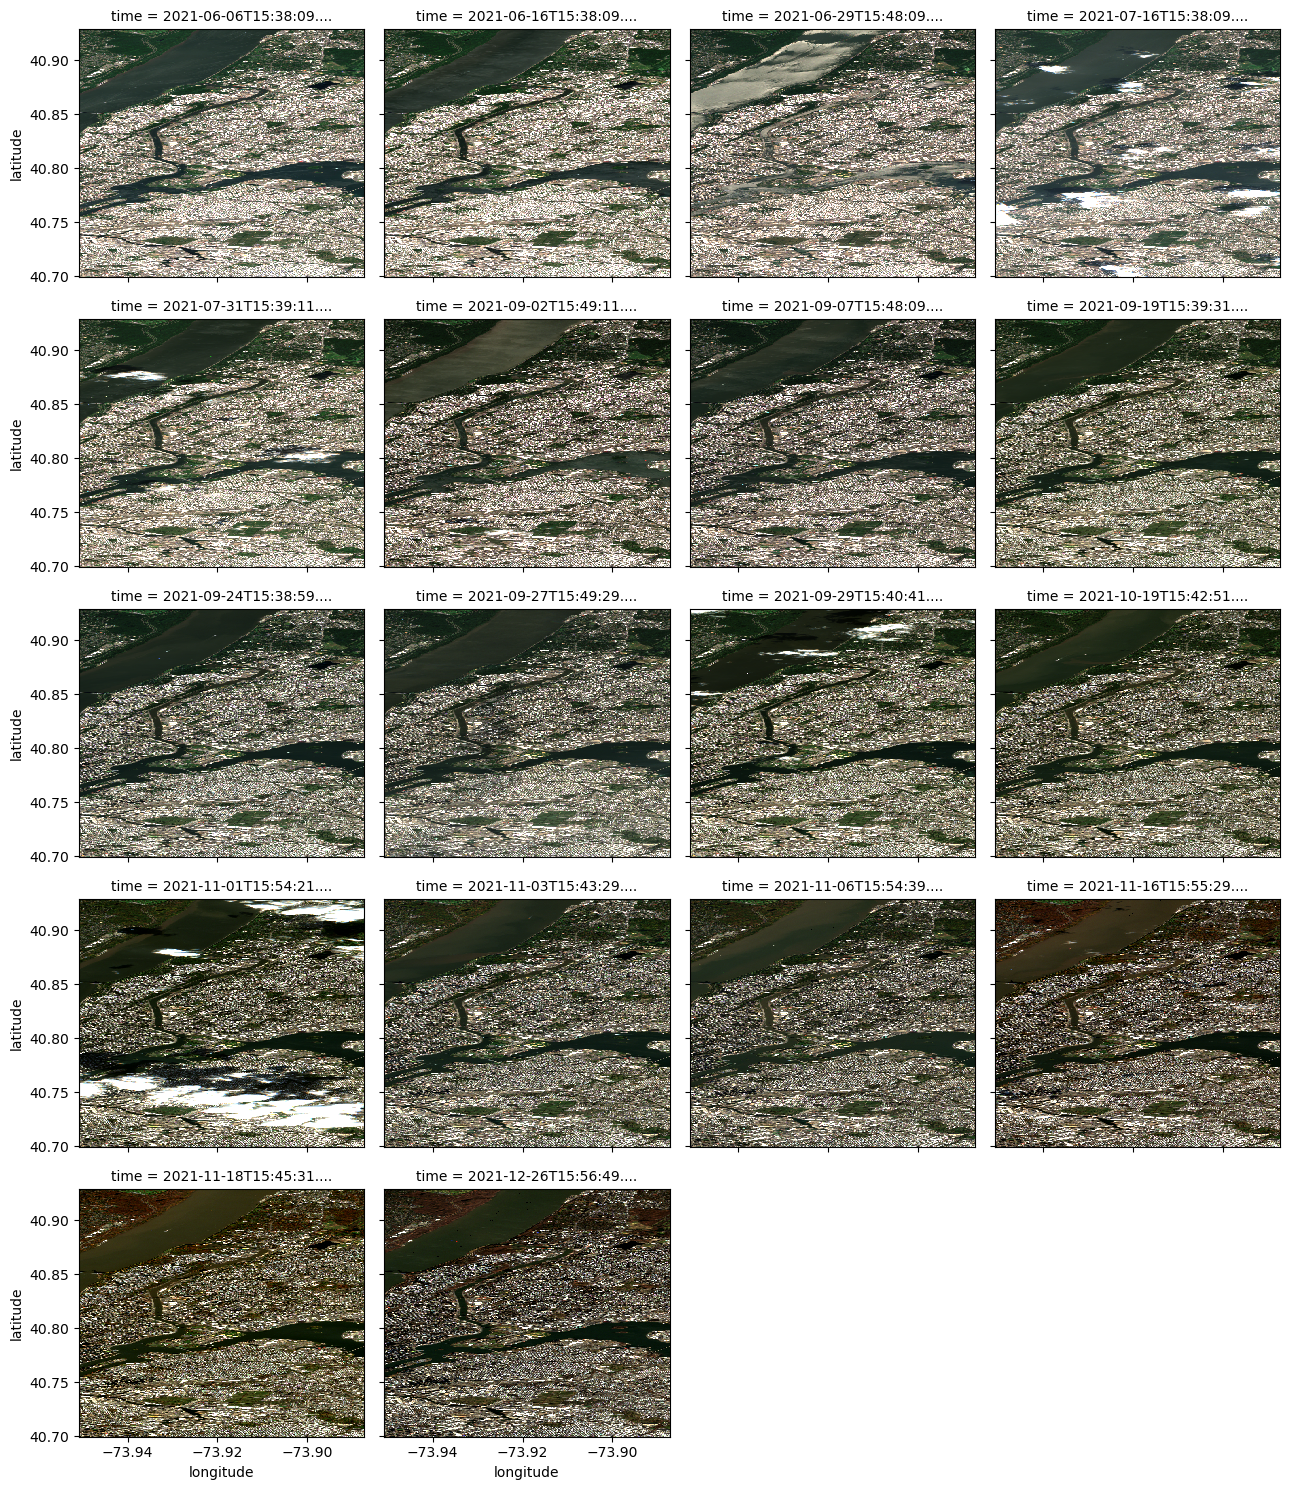

In [121]:
# Plot sample images from the time series
plot_data = datas[["B04","B03","B02"]].to_array()
plot_data.plot.imshow(col='time', col_wrap=4, robust=True, vmin=0, vmax=2500)
plt.show()

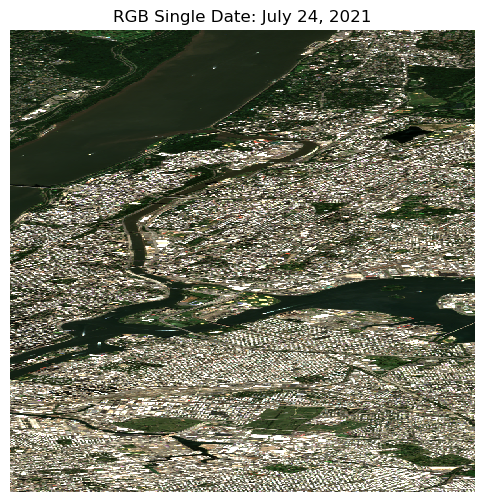

In [122]:
# Plot an RGB image for a single date
fig, ax = plt.subplots(figsize=(6,6))
plot_data.isel(time=7).plot.imshow(robust=True, ax=ax, vmin=0, vmax=2500)
ax.set_title("RGB Single Date: July 24, 2021")
ax.axis('off')
plt.show()

In [123]:
median = datas.median(dim="time").compute()

In [124]:
ndvi_median = (median.B08-median.B04)/(median.B08+median.B04)

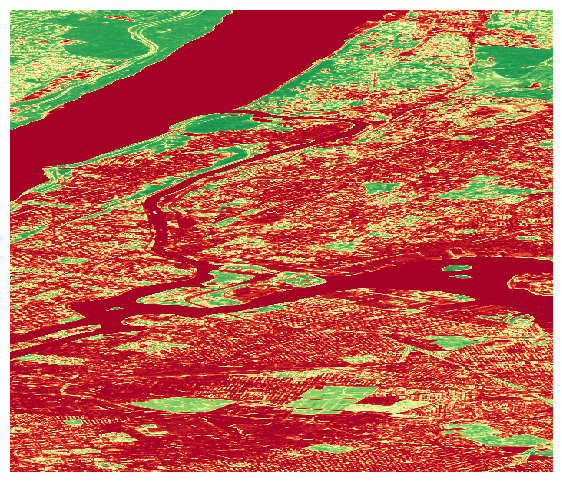

In [133]:
fig, ax = plt.subplots(figsize=(7,6))
ndvi_median.plot.imshow(vmin=0.0, vmax=1.0, cmap="RdYlGn", add_colorbar = False)
plt.title("Median NDVI")
plt.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.title("")
plt.savefig("median_ndvi_square.png", dpi=300, bbox_inches="tight", pad_inches=0)

plt.show()

In [126]:
ndvi_median.shape

(2546, 707)

In [ ]:
x['Bounds'][0]

In [135]:
!git

Initialized empty Git repository in C:/Users/haoho/Project/.git/


In [141]:
!git add .

In [143]:
!git remote add origin https://github.com/keemstarr123/EY-Open-Science.git


In [145]:
!git add EYOpenScience.ipynb
!git commit -m "Added Jupyter Notebook"

[master (root-commit) 009d097] Added Jupyter Notebook
 15362 files changed, 2199981 insertions(+)
 create mode 100644 .ipynb_checkpoints/Untitled-checkpoint.ipynb
 create mode 100644 AI Agent/WebScraper.py
 create mode 100644 AI Agent/venv/Include/site/python3.10/greenlet/greenlet.h
 create mode 100644 AI Agent/venv/Lib/site-packages/PyYAML-6.0.2.dist-info/INSTALLER
 create mode 100644 AI Agent/venv/Lib/site-packages/PyYAML-6.0.2.dist-info/LICENSE
 create mode 100644 AI Agent/venv/Lib/site-packages/PyYAML-6.0.2.dist-info/METADATA
 create mode 100644 AI Agent/venv/Lib/site-packages/PyYAML-6.0.2.dist-info/RECORD
 create mode 100644 AI Agent/venv/Lib/site-packages/PyYAML-6.0.2.dist-info/WHEEL
 create mode 100644 AI Agent/venv/Lib/site-packages/PyYAML-6.0.2.dist-info/top_level.txt
 create mode 100644 AI Agent/venv/Lib/site-packages/README.rst
 create mode 100644 AI Agent/venv/Lib/site-packages/SQLAlchemy-2.0.38.dist-info/INSTALLER
 create mode 100644 AI Agent/venv/Lib/site-packages/SQLAlch

Auto packing the repository for optimum performance.
See "git help gc" for manual housekeeping.


 create mode 100644 AI Agent/venv/Lib/site-packages/langchain/chains/llm_summarization_checker/base.py
 create mode 100644 AI Agent/venv/Lib/site-packages/langchain/chains/llm_summarization_checker/prompts/are_all_true_prompt.txt
 create mode 100644 AI Agent/venv/Lib/site-packages/langchain/chains/llm_summarization_checker/prompts/check_facts.txt
 create mode 100644 AI Agent/venv/Lib/site-packages/langchain/chains/llm_summarization_checker/prompts/create_facts.txt
 create mode 100644 AI Agent/venv/Lib/site-packages/langchain/chains/llm_summarization_checker/prompts/revise_summary.txt
 create mode 100644 AI Agent/venv/Lib/site-packages/langchain/chains/llm_symbolic_math/__init__.py
 create mode 100644 AI Agent/venv/Lib/site-packages/langchain/chains/llm_symbolic_math/__pycache__/__init__.cpython-310.pyc
 create mode 100644 AI Agent/venv/Lib/site-packages/langchain/chains/loading.py
 create mode 100644 AI Agent/venv/Lib/site-packages/langchain/chains/mapreduce.py
 create mode 100644 AI A

In [155]:
!git push origin master


remote: 
remote: Create a pull request for 'master' on GitHub by visiting:        
remote:      https://github.com/keemstarr123/EY-Open-Science/pull/new/master        
remote: 
To https://github.com/keemstarr123/EY-Open-Science.git
 * [new branch]      master -> master


In [151]:
!git branch


* master


In [165]:
!git checkout main


D	.ipynb_checkpoints/Untitled-checkpoint.ipynb
M	EYOpenScience.ipynb
D	Untitled.ipynb


Already on 'main'


In [169]:
!git pull origin main --rebase


error: cannot pull with rebase: You have unstaged changes.
error: Please commit or stash them.
